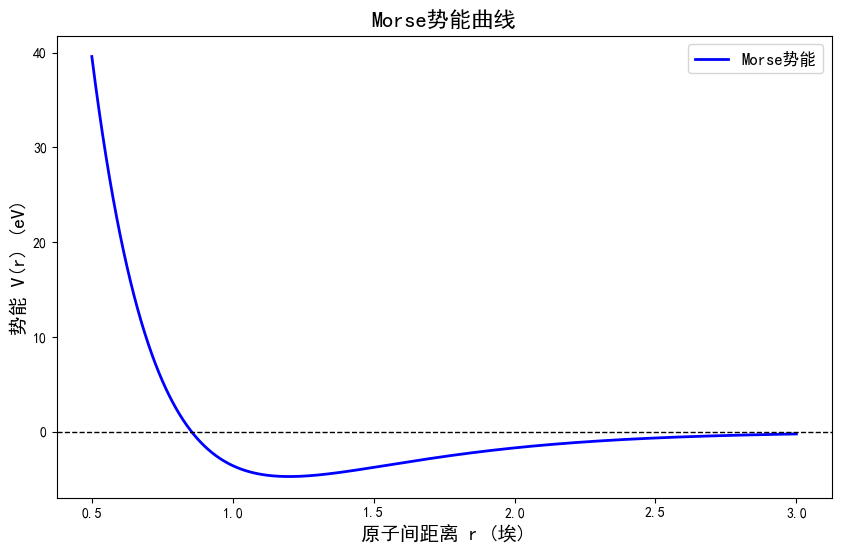

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # Windows: 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 防止负号显示异常
# Morse势能参数
D_e = 4.75    # 势阱深度，例如单位：eV
r_e = 1.2     # 平衡键长，例如单位：Å
a = 2.0       # 参数 a，决定势曲线宽度

def morse_potential(r, D_e=D_e, r_e=r_e, a=a):
    return D_e * (1 - np.exp(-a * (r - r_e)))**2 - D_e

# 构造 r 数据，注意避免 r=0 处的问题
r_values = np.linspace(0.5, 3.0, 1000)
V_values = morse_potential(r_values)

plt.figure(figsize=(10, 6))
plt.plot(r_values, V_values, 'b-', lw=2, label="Morse势能")
plt.xlabel("原子间距离 r (埃)", fontsize=14)
plt.ylabel("势能 V(r) (eV)", fontsize=14)
plt.title("Morse势能曲线", fontsize=16)
plt.axhline(y=0, color='k', lw=1,linestyle='--')
plt.legend(fontsize=12)
plt.savefig("./output/Morse势能曲线.png", dpi=300)
plt.show()


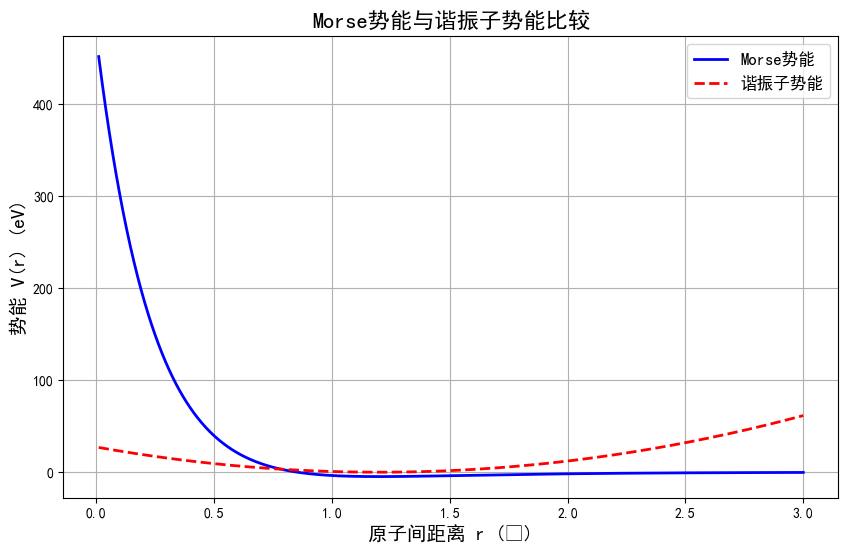

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Morse势能参数（单位可根据具体情况选择，此处示例）
D_e = 4.75    # 势阱深度 (eV)
r_e = 1.2     # 平衡键长 (Å)
a = 2.0       # 参数 a

# 定义Morse势能函数
def morse_potential(r, D_e=D_e, r_e=r_e, a=a):
    return D_e * (1 - np.exp(-a * (r - r_e)))**2 - D_e

# 根据泰勒展开，谐振子势能的力常数取 k = 2D_e a^2
k = 2 * D_e * a**2

# 定义谐振子势能函数（相对于平衡点 V(r_e) = 0）
def harmonic_potential(r, k=k, r_e=r_e):
    return 0.5 * k * (r - r_e)**2

# 构造 r 数据（例如从 0.5 到 3.0 Å），避开 r=0
r_values = np.linspace(0.01, 3, 1000)
V_morse = morse_potential(r_values)
V_harmonic = harmonic_potential(r_values)

# 绘制势能曲线进行比较
plt.figure(figsize=(10, 6))
plt.plot(r_values, V_morse, 'b-', lw=2, label="Morse势能")
plt.plot(r_values, V_harmonic, 'r--', lw=2, label="谐振子势能")
plt.xlabel("原子间距离 r (Å)", fontsize=14)
plt.ylabel("势能 V(r) (eV)", fontsize=14)
plt.title("Morse势能与谐振子势能比较", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
